In [45]:
from skimage import data as sd
import skimage.color as sc
from skimage.viewer import ImageViewer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

pd.set_option('precision',10)

img = sd.imread('244694.jpg')
img_hsv = sc.convert_colorspace(img, 'RGB', 'HSV')

viewer = ImageViewer(img_hsv)

img_hsv.shape #(600, 467, 3) height, width, 3 vals for HSV

(600, 562, 3)

In [46]:
def average_hsv(img_hsv):

    height = len(img_hsv)
    width = len(img_hsv[0])
    pixels = height * width
    sum_hue = 0
    sum_saturation = 0
    sum_value = 0

    for i in range(height):
        for j in range(width):
            sum_hue += img_hsv[i][j][0]
            sum_saturation += img_hsv[i][j][1]
            sum_value += img_hsv[i][j][2]

    avg_hue = sum_hue / pixels
    avg_saturation = sum_saturation / pixels
    avg_value = sum_value / pixels

    return avg_hue, avg_saturation, avg_value
        
        
avg_hue, avg_saturation, avg_value = average_hsv(img_hsv)
avg_hue, avg_saturation, avg_value

(0.180081645462629, 0.20095170619439814, 0.61403065615350072)

In [47]:
def hsv_df(img_hsv):
    height = len(img_hsv)
    width = len(img_hsv[0])
    pixels = height * width
    hue = []
    saturation = []
    value = []
    
    for i in range(height):
        for j in range(width):
            hue.append(img_hsv[i][j][0])
            saturation.append(img_hsv[i][j][1])
            value.append(img_hsv[i][j][2])
            
    data = {'H': hue, 'S': saturation, 'V': value}
    hsv_df = pd.DataFrame(data=data)
    
    return hsv_df

df = hsv_df(img_hsv)

df.mean()


H    0.1800816455
S    0.2009517062
V    0.6140306562
dtype: float64

In [48]:
df.std()

H    0.0913003521
S    0.1607581931
V    0.1673831123
dtype: float64

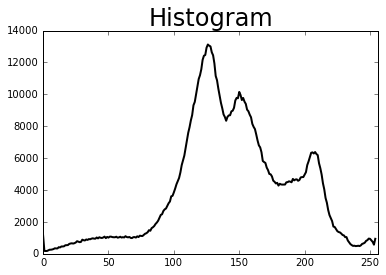

In [49]:
##rgb historgram

fig, ax = plt.subplots()

values, bins = np.histogram(img, bins=np.arange(256))
ax.plot(bins[:-1], values, lw=2, c='k')
ax.set_xlim(xmax=256)
ax.set_title('Histogram', fontsize=24)

In [56]:
# for 20 bins, find the count of pixels that fall there, probably this should be divided by total pixels such that we have percentages

bins = [0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00]

pd.cut(df['H'], bins=bins).value_counts()

(0.15, 0.2]    151480
(0.1, 0.15]    117969
(0.2, 0.25]     21672
(0.05, 0.1]     10675
(0.25, 0.3]     10058
(0.3, 0.35]      8404
(0.35, 0.4]      3528
(0.45, 0.5]      2822
(0.55, 0.6]      2815
(0.6, 0.65]      2453
(0.4, 0.45]      1576
(0.5, 0.55]      1373
(0.0, 0.05]       583
(0.65, 0.7]       338
(0.9, 0.95]       263
(0.95, 1.0]       194
(0.7, 0.75]       114
(0.85, 0.9]        92
(0.75, 0.8]        88
(0.8, 0.85]        79
Name: H, dtype: int64